In [382]:
import importlib
import seaborn as sns

In [383]:
import numpy as np
import matplotlib.pyplot as plt
import helpers

In [384]:
importlib.reload(helpers)

<module 'helpers' from '/Users/daniildubinin/Documents/lecture-notes/MA1/ML/MLProject1/helpers.py'>

# First Filter (Useless Feautures)

In [378]:
fields_to_drop = ["_STATE","FMONTH","IDATE","IMONTH",
    "IDAY","IYEAR","DISPCODE","SEQNO","_PSU",
    "CTELENUM","PVTRESD1","STATERES","CELLFON3",
    "LADULT","NUMADULT","NUMMEN","NUMWOMEN",
    "CTELNUM1","CELLFON2","CADULT","PVTRESD2",
    "CSTATE","LANDLINE","HHADULT","HLTHPLN1",
    "MARITAL","EDUCA","RENTHOM1","NUMHHOL2",
    "NUMPHON2","CPDEMO1","VETERAN3","EMPLOY1",
    "CHILDREN","INCOME2","INTERNET","MEDCOST",
    "USEEQUIP","BLIND","DECIDE", "DIFFWALK",
    "DIFFDRES","DIFFALON","SEATBELT", "IMFVPLAC", 
    "CAREGIV1","CRGVREL1","CRGVLNG1","CRGVHRS1",
    "CRGVPRB1","CRGVPERS","CRGVHOUS","CRGVEXPT",
    "VINOCRE2","VIINSUR2","CDHELP","SXORIENT", 
    "TRNSGNDR","RCSGENDR", "RCSRLTN2", "QSTVER",
    "QSTLANG","MSCODE",'_STSTR','_STRWT',
    '_RAWRAKE','_WT2RAKE','_CHISPNC','_DUALUSE',
    '_DUALCOR','_LLCPWT','_HCVU651','_DRDXAR1',
    '_PRACE1','_MRACE1','_HISPANC','_RACE',
    '_RACEG21','_RACEGR3','_RACE_G1','_CHLDCNT',
    '_EDUCAG','_INCOMG','_RFSEAT2','_RFSEAT3']


# Load dataset

In [379]:
train_dict, test_dict, y_train, train_ids, test_ids = helpers.load_csv_data('data/dataset')

# Remove feautures with >70% missing values

In [380]:
keep_dict = helpers.filter_features_by_nan(train_dict,threshold=70)

Keeping 200 features


# Drop "fields_to drop"

In [385]:
train_clean, test_clean= helpers.drop_and_keep_features(keep_dict, test_dict, fields_to_drop)

In [386]:
len(train_clean)

130

# Dictionary with feautures where 7, 9 etc with "refused" or "don't know" answers

In [387]:
invalid_dict = {
    (7,9): ['GENHLTH','PERSDOC2','CHECKUP1',
            'BPHIGH4','BPMEDS','BLOODCHO',
            'CHOLCHK','TOLDHI2','CVDSTRK3',
            'ASTHMA3','CHCSCNCR','CHCOCNCR',
            'CHCCOPD1','HAVARTH3','ADDEPEV2',
            'CHCKIDNY','DIABETE3','QLACTLM2',
            'SMOKE100','SMOKDAY2','USENOW3',
            'EXERANY2','CHOLCHK','DRNKANY5',
            '_RFBMI5','_CHOLCHK','_RFSMOK3',
            'PAMISS1_','PNEUVAC3','FLUSHOT6'],
    (77,99): ['PHYSHLTH','MENTHLTH','POORHLTH',
              'DRNK3GE5','MAXDRNKS','AVEDRNK2',
              'EXRACT11'],
    (777,999): ['ALCDAY5','FRUITJU1','FRUIT1',
                'FVBEANS','FVGREEN','FVORANG',
                'VEGETAB1','EXEROFT1','EXERHMM1','MAXVO2_',
                'FC60_'],
    (7777,9999): ['WEIGHT2','HEIGHT3'],
    (9): ['_VEGLT1','_TOTINDA','_PACAT1',
          '_PAINDX1','_PA150R2', '_PA300R2',
          '_PA30021', '_PASTRNG', '_PAREC1',
          '_PASTAE1', '_FLSHOT6', '_LMTACT1',
          '_LMTWRK1','_LMTSCL1','_PNEUMO2',
          '_AIDTST3', '_RFHLTH','_RFHYPE5',
          '_LTASTH1','_CASTHM1', '_ASTHMS1',
          '_SMOKER3','_RFBING5','_RFDRHV5',
          '_FRTLT1','_RFCHOL'],
    (99): ['PAFREQ1_', 'PAFREQ2_', 'STRFREQ_'],

    (99900): ['_DRNKWEK'],
    (14): ['_AGEG5YR'],
    (99999): ['WTKG3'],
    (900): ['DROCDY3','DROCDY3_'],
    (3): ['_AGE65YR']

    
}

# Replace 7,9 etc with nans

In [388]:
helpers.replace_invalid_with_nan_inplace(train_clean, invalid_dict)

In [389]:
n_rows = len(next(iter(train_clean.values())))  # number of samples

for name, values in train_clean.items():
    if name in set(list(train_clean.keys())):
        nan_pct = np.isnan(values).sum() / n_rows * 100
        print(f'{name}: {nan_pct}')

GENHLTH: 0.27062032395203195
PHYSHLTH: 2.166181602084508
MENTHLTH: 1.6331692748411477
POORHLTH: 49.80175842260046
PERSDOC2: 0.406235238545111
CHECKUP1: 1.3549301354625383
BPHIGH4: 0.27976290246392493
BPMEDS: 59.89912688375212
BLOODCHO: 2.114983162417907
CHOLCHK: 14.660429396437442
TOLDHI2: 14.117360232831
CVDSTRK3: 0.224602678775504
ASTHMA3: 0.2998765751900894
CHCSCNCR: 0.2486781355234888
CHCOCNCR: 0.19930821155926676
CHCCOPD1: 0.4714522985966142
HAVARTH3: 0.5738491779298155
ADDEPEV2: 0.44189129474149363
CHCKIDNY: 0.29774330687064776
DIABETE3: 0.14597650357322445
SEX: 0.0
WEIGHT2: 7.00961494506834
HEIGHT3: 3.4622944824538684
QLACTLM2: 2.78787694089323
SMOKE100: 3.9465463909671326
SMOKDAY2: 58.39761073948223
USENOW3: 3.792036814116141
ALCDAY5: 4.868118304965944
AVEDRNK2: 52.88158837064013
DRNK3GE5: 52.84837033538026
MAXDRNKS: 53.748304813567586
FRUITJU1: 8.644612735611867
FRUIT1: 8.206073719658068
FVBEANS: 8.954241394547974
FVGREEN: 8.50046474774102
FVORANG: 8.825026284913221
VEGETAB1: 

# Drop feautures with > 30 nan's (à contrôler les feautures qui ont été drop)

## Feautures with >20% nan's

In [390]:
n_rows = len(next(iter(train_clean.values())))  # number of samples
feautures_20 = {}

for name, values in train_clean.items():
    if name in set(list(train_clean.keys())):
        nan_pct = np.isnan(values).sum() / n_rows * 100
        if nan_pct >30:
            feautures_20[name] = round(float(nan_pct),2)
            print(f'{name}: {nan_pct}')

POORHLTH: 49.80175842260046
BPMEDS: 59.89912688375212
SMOKDAY2: 58.39761073948223
AVEDRNK2: 52.88158837064013
DRNK3GE5: 52.84837033538026
MAXDRNKS: 53.748304813567586
EXRACT11: 33.13483779541957
EXEROFT1: 33.90586191658921
EXERHMM1: 34.678714553461226
EXRACT21: 33.428314565651334
EXEROFT2: 55.23976412147439
EXERHMM2: 55.282124735246164
LMTJOIN3: 69.15050207993662
ARTHDIS2: 69.1919484358572
ARTHSOCL: 69.23888033888491
JOINPAIN: 69.81516753775124
FLSHTMY2: 56.916513020555556
METVL11_: 33.13483779541957
METVL21_: 34.261812973318904
ACTIN11_: 33.84948268243254
ACTIN21_: 34.95451567190333
PADUR1_: 34.678714553461226
PADUR2_: 56.27043747238179
PAFREQ1_: 33.9101284532281
PAFREQ2_: 55.74809148673564
_MINAC11: 35.09287336004998
_MINAC21: 35.60150547792829
PAMIN11_: 35.76424337543999
PAMIN21_: 36.26678044097704
PA1MIN_: 34.39407560912429
PAVIG11_: 34.676276532524724
PAVIG21_: 35.65971322778734
PA1VIGM_: 34.06920931933503
_FLSHOT6: 68.68026879180825
_PNEUMO2: 69.6634007344538


## Drop them

In [391]:
keep_dict = helpers.filter_features_by_nan(train_clean,threshold=30)

Keeping 95 features


# percentage of missing values with left feautures

In [392]:
n_rows = len(next(iter(keep_dict.values())))  # number of samples

for name, values in keep_dict.items():
    if name in set(list(keep_dict.keys())):
        nan_pct = np.isnan(values).sum() / n_rows * 100
        print(f'{name}: {nan_pct}')

GENHLTH: 0.27062032395203195
PHYSHLTH: 2.166181602084508
MENTHLTH: 1.6331692748411477
PERSDOC2: 0.406235238545111
CHECKUP1: 1.3549301354625383
BPHIGH4: 0.27976290246392493
BLOODCHO: 2.114983162417907
CHOLCHK: 14.660429396437442
TOLDHI2: 14.117360232831
CVDSTRK3: 0.224602678775504
ASTHMA3: 0.2998765751900894
CHCSCNCR: 0.2486781355234888
CHCOCNCR: 0.19930821155926676


CHCCOPD1: 0.4714522985966142
HAVARTH3: 0.5738491779298155
ADDEPEV2: 0.44189129474149363
CHCKIDNY: 0.29774330687064776
DIABETE3: 0.14597650357322445
SEX: 0.0
WEIGHT2: 7.00961494506834
HEIGHT3: 3.4622944824538684
QLACTLM2: 2.78787694089323
SMOKE100: 3.9465463909671326
USENOW3: 3.792036814116141
ALCDAY5: 4.868118304965944
FRUITJU1: 8.644612735611867
FRUIT1: 8.206073719658068
FVBEANS: 8.954241394547974
FVGREEN: 8.50046474774102
FVORANG: 8.825026284913221
VEGETAB1: 9.323296813811389
EXERANY2: 8.55349170311
STRENGTH: 8.730248221006597
FLUSHOT6: 10.013561491459308
PNEUVAC3: 17.663766437594283
HIVTST6: 9.776463955384216
_RFHLTH: 0.27062032395203195
_RFHYPE5: 0.27976290246392493
_CHOLCHK: 3.426943178874549
_RFCHOL: 14.117360232831
_LTASTH1: 0.2998765751900894
_CASTHM1: 0.7112926082252731
_ASTHMS1: 0.7112926082252731
_AGEG5YR: 1.2016395690797994
_AGE65YR: 1.2016395690797994
_AGE80: 0.0
_AGE_G: 0.0
HTIN4: 3.876758041659683
HTM4: 3.46442775077331
WTKG3: 7.0111387081536565
_BMI5: 8.25056760174928
_

In [399]:
new_to_drop = [
'PHYSHLTH', 'MENTHLTH', 'BPHIGH4',
'_CHOLCHK', 'BLOODCHO', 'CHOLCHK',
'TOLDHI2', '_CASTHM1', '_LTASTH1',
'ASTHMA3', 'HIVTST6', '_AGE80',
'_AGE_G', '_LMTSCL1' , 'WEIGHT2',
'HEIGHT3','HTIN4','HTM4','WTKG3',
'_BMI5','_RFBMI5','QLACTLM2',
'EXERANY2','STRENGTH','_TOTINDA',
'STRFREQ_','PAMISS1_', '_PA150R2',
'_PA300R2','_PA30021','_PASTRNG',
'_PASTAE1','_LMTWRK1', 'SMOKE100',
'USENOW3','_RFSMOK3','ALCDAY5',
'DRNKANY5', 'DROCDY3_','_RFDRHV5',
'_MISFRTN','_MISVEGN',
 '_FRTRESP', '_VEGRESP','_FRUITEX','_VEGETEX',
 'GENHLTH', 'FRUITJU1', 'FRUIT1', 'FVBEANS',
 'FVGREEN', 'FVORANG','VEGETAB1',
 '_FRUTSUM','_VEGESUM','_FRT16','_VEG23',
 '_VEGLT1','_FRTLT1','_AGE65YR'

]

In [400]:
train_clean, test_clean = helpers.drop_and_keep_features(keep_dict, test_dict, new_to_drop)

In [401]:
len(train_clean)

35

In [402]:
import pandas as pd

In [403]:
# Convert to DataFrame
df = pd.DataFrame(train_clean)

# Drop rows with NaNs (like in your example)
#df_clean = df.dropna()
df['y'] = pd.Series(y_train)

In [404]:
train_clean

{'PERSDOC2': array([1., 1., 1., ..., 1., 1., 2.], shape=(328135,)),
 'CHECKUP1': array([1., 1., 1., ..., 1., 1., 1.], shape=(328135,)),
 'CVDSTRK3': array([2., 2., 2., ..., 2., 2., 2.], shape=(328135,)),
 'CHCSCNCR': array([2., 2., 2., ..., 2., 2., 2.], shape=(328135,)),
 'CHCOCNCR': array([2., 2., 2., ..., 2., 2., 2.], shape=(328135,)),
 'CHCCOPD1': array([2., 2., 2., ..., 2., 2., 2.], shape=(328135,)),
 'HAVARTH3': array([2., 2., 1., ..., 2., 2., 1.], shape=(328135,)),
 'ADDEPEV2': array([1., 2., 2., ..., 1., 2., 2.], shape=(328135,)),
 'CHCKIDNY': array([2., 2., 2., ..., 2., 2., 2.], shape=(328135,)),
 'DIABETE3': array([3., 3., 3., ..., 3., 3., 3.], shape=(328135,)),
 'SEX': array([2., 1., 2., ..., 2., 1., 2.], shape=(328135,)),
 'FLUSHOT6': array([ 1., nan,  1., ...,  2.,  1.,  2.], shape=(328135,)),
 'PNEUVAC3': array([ 2., nan,  2., ...,  2.,  2.,  2.], shape=(328135,)),
 '_RFHLTH': array([1., 2., 1., ..., 1., 1., 1.], shape=(328135,)),
 '_RFHYPE5': array([1., 2., 1., ..., 1., 1

In [405]:
y_train

array([-1, -1, -1, ..., -1, -1, -1], shape=(328135,))

# separate y=1, y=-1

In [406]:
mask_pos = (y_train == 1)
mask_neg = (y_train == -1)

# split features
features_pos = {k: v[mask_pos] for k, v in train_clean.items()}
features_neg = {k: v[mask_neg] for k, v in train_clean.items()}

# split targets
y_pos = y_train[mask_pos]
y_neg = y_train[mask_neg]


In [407]:
print(f'y = -1: {len(y_neg)}')
print(f'y = 1: {len(y_pos)}')

y = -1: 299160
y = 1: 28975


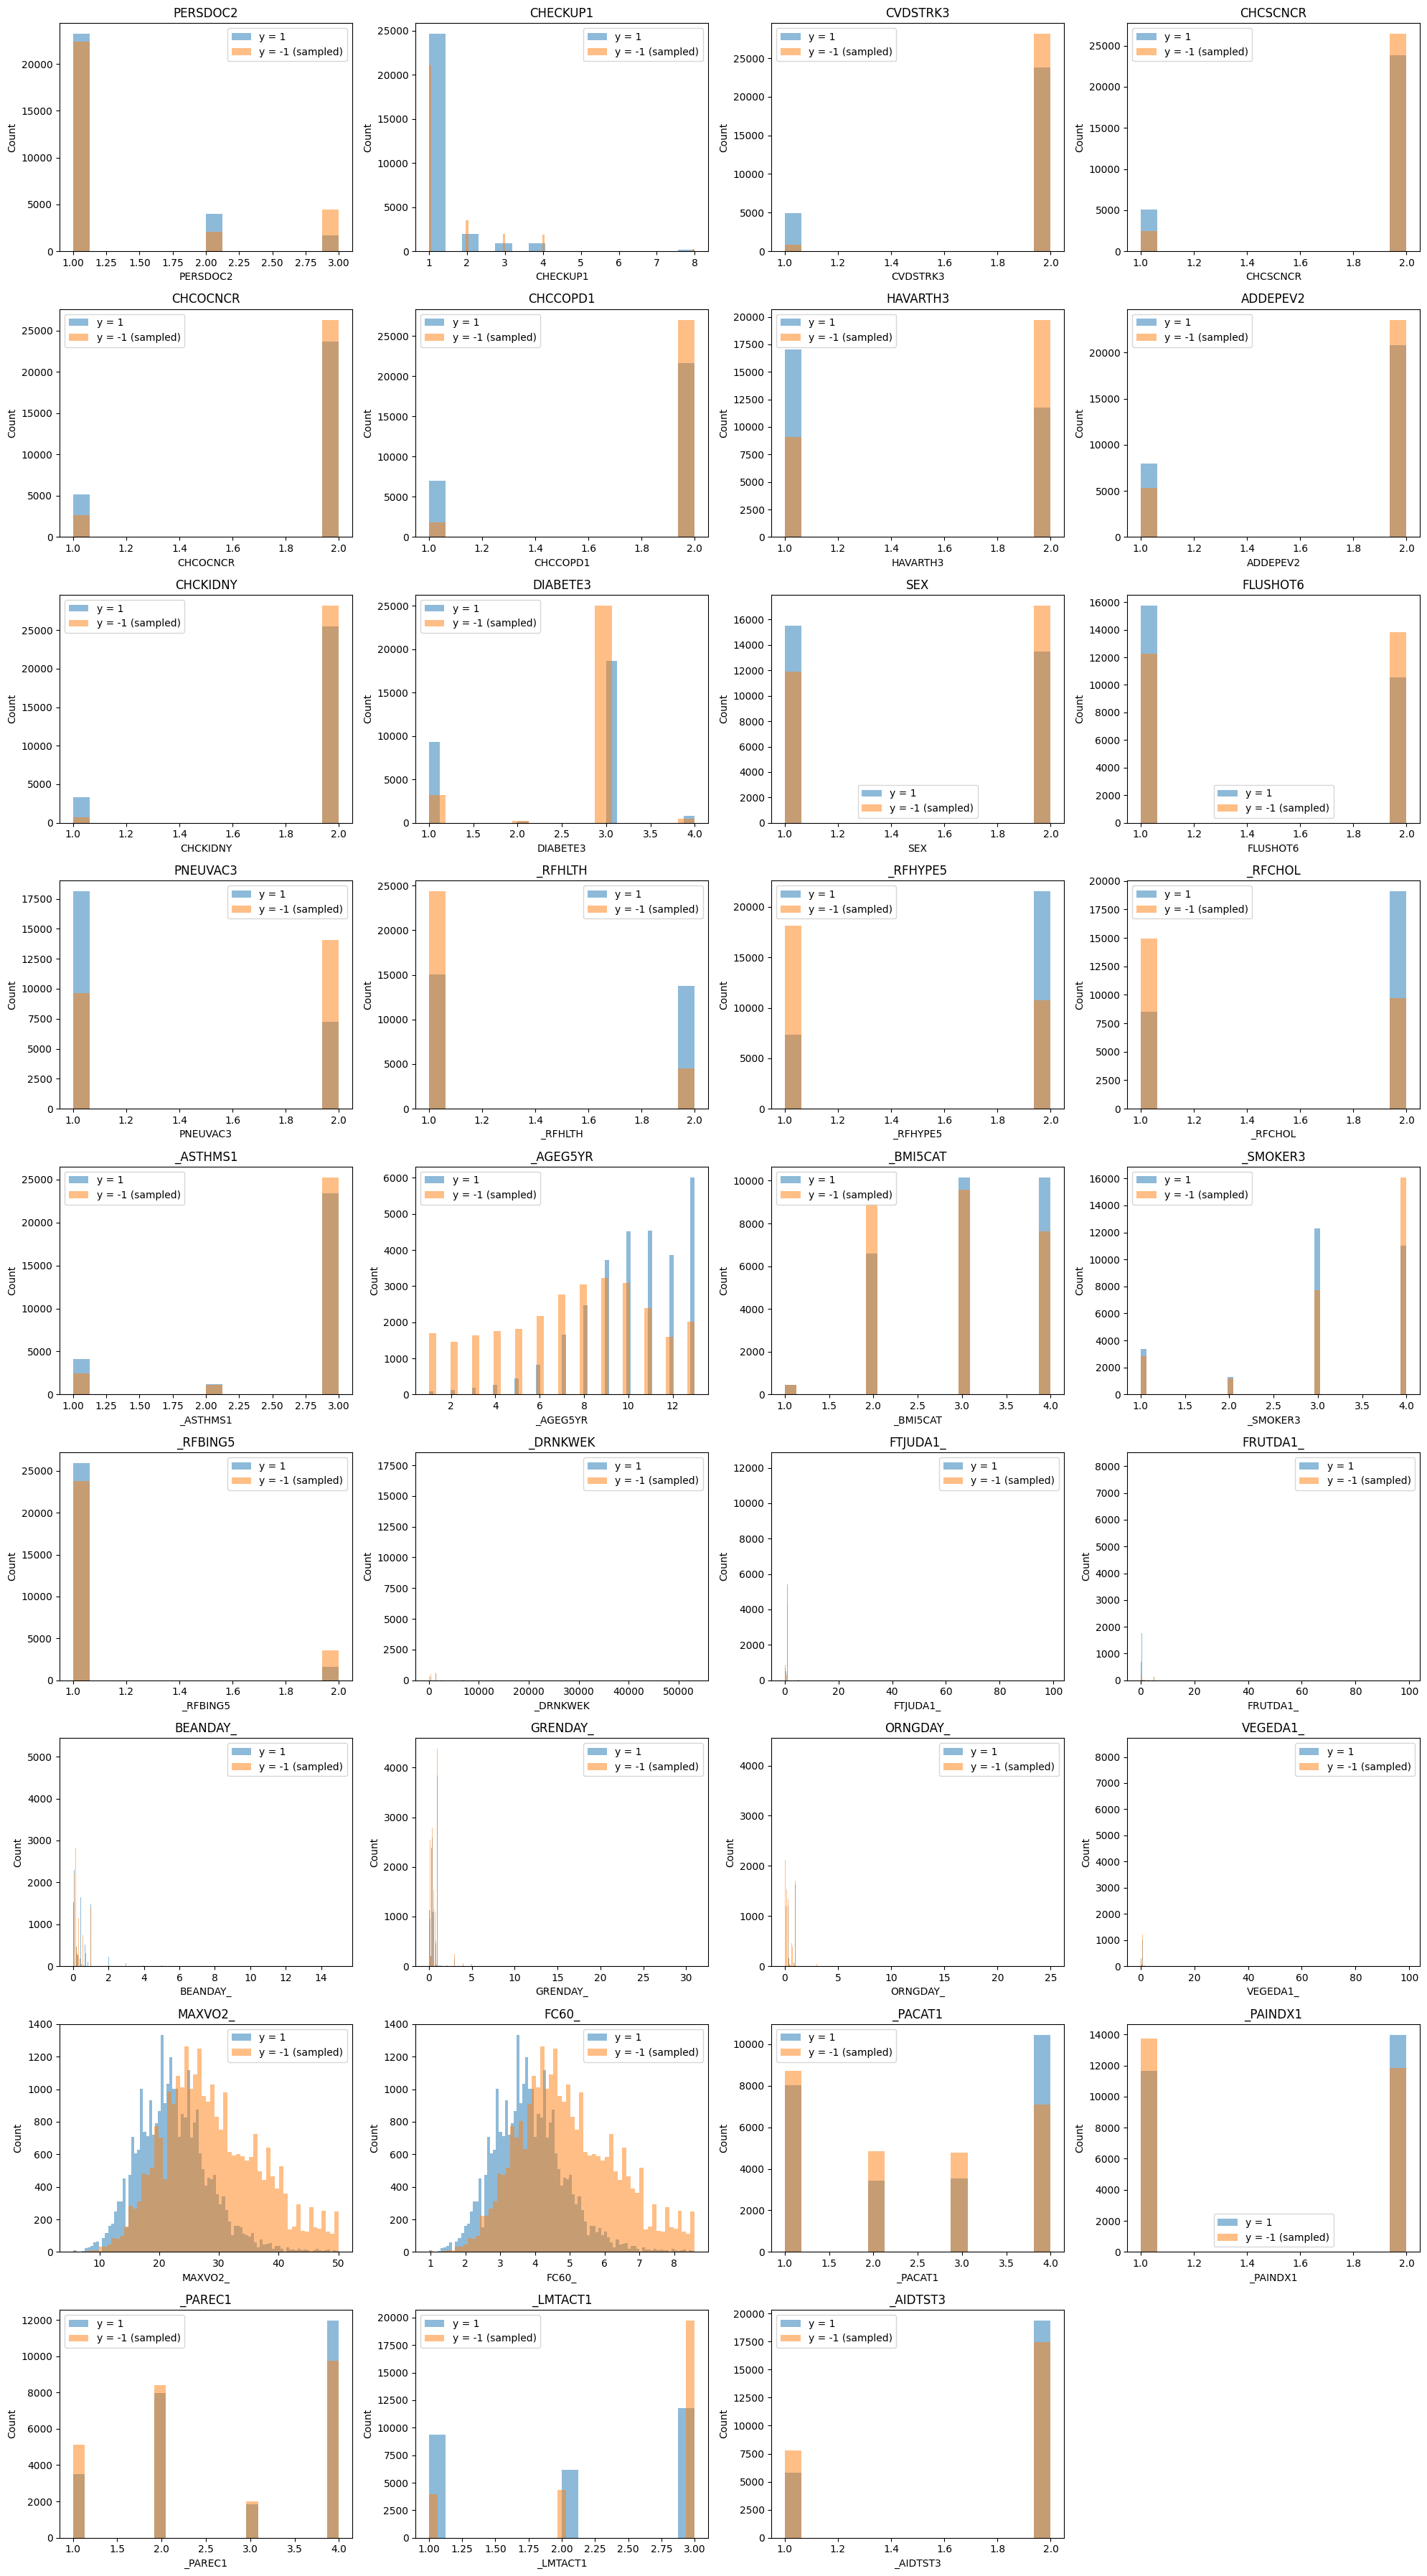

In [408]:
import numpy as np
import matplotlib.pyplot as plt

# count how many samples in each class
n_pos = np.sum(y_train == 1)
idx_pos = np.where(y_train == 1)[0]
idx_neg = np.where(y_train == -1)[0]

# random subsample negatives
np.random.seed(42)
idx_neg_sampled = np.random.choice(idx_neg, size=n_pos, replace=False)

# number of features
n_features = len(train_clean)
n_cols = 4
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))

for i, (feature_name, values) in enumerate(train_clean.items()):
    ax = axes.flat[i]
    
    vals_pos = values[idx_pos]
    vals_neg = values[idx_neg_sampled]
    
    ax.hist(vals_pos, bins='auto', alpha=0.5, label="y = 1")
    ax.hist(vals_neg, bins='auto', alpha=0.5, label="y = -1 (sampled)")
    
    ax.set_title(feature_name)
    ax.set_xlabel(feature_name)
    ax.set_ylabel("Count")
    ax.legend()

# Hide empty subplots (if number of features not multiple of 4)
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()


## Observe that FC60 and MAXVO2 have same distributions

In [409]:
# First condition: values 1 or 2 → set to 1
train_clean['PERSDOC2'][np.where((train_clean['PERSDOC2'] == 1) | (train_clean['PERSDOC2'] == 2))] = 1

# Second condition: values 3 → set to 2
train_clean['PERSDOC2'][np.where(train_clean['PERSDOC2'] == 3)] = 2

train_clean['CHECKUP1'][np.where(
    (train_clean['CHECKUP1'] == 2) | 
    (train_clean['CHECKUP1'] == 3) | 
    (train_clean['CHECKUP1'] == 4) | 
    (train_clean['CHECKUP1'] == 8)
)] = 2

In [410]:
import pandas as pd

In [476]:
df = pd.DataFrame(train_clean)
df['y'] = y_train

In [412]:
df.head()

,PERSDOC2,CHECKUP1,CVDSTRK3,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,...,ORNGDAY_,VEGEDA1_,MAXVO2_,FC60_,_PACAT1,_PAINDX1,_PAREC1,_LMTACT1,_AIDTST3,y
0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,...,0.27,0.71,26.91,4.61,2.0,1.0,1.0,3.0,2.0,-1
1,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,NaN,NaN,28.65,4.91,NaN,NaN,NaN,3.0,NaN,-1
2,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,...,0.43,1.00,23.95,4.11,3.0,2.0,4.0,2.0,2.0,-1
3,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,...,0.71,1.00,23.95,4.11,1.0,1.0,2.0,2.0,2.0,-1
4,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,0.27,0.83,NaN,NaN,NaN,NaN,NaN,3.0,2.0,-1


In [413]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder

X = df.dropna().drop(columns=['y'])
y = df.dropna()['y']

# Encode categoricals
X_enc = OrdinalEncoder().fit_transform(X)

# Mutual Information scores
mi = mutual_info_classif(X_enc, y, discrete_features=True)

mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_scores)


MAXVO2_     0.031975
FC60_       0.031796
_AGEG5YR    0.025942
_RFHLTH     0.022919
_RFHYPE5    0.021041
PNEUVAC3    0.016067
_RFCHOL     0.015482
CVDSTRK3    0.012462
DIABETE3    0.012281
CHCCOPD1    0.012062
_LMTACT1    0.011989
HAVARTH3    0.010592
_SMOKER3    0.006629
CHCKIDNY    0.006167
_DRNKWEK    0.005438
SEX         0.003865
GRENDAY_    0.003753
_PACAT1     0.003712
CHCOCNCR    0.002481
CHECKUP1    0.002356
CHCSCNCR    0.002115
FRUTDA1_    0.002065
_PAREC1     0.001975
_BMI5CAT    0.001890
ADDEPEV2    0.001881
_RFBING5    0.001849
PERSDOC2    0.001805
FLUSHOT6    0.001721
_PAINDX1    0.001355
_ASTHMS1    0.001186
_AIDTST3    0.001149
VEGEDA1_    0.001149
FTJUDA1_    0.001072
ORNGDAY_    0.000905
BEANDAY_    0.000674
dtype: float64


# Variable working (can also just take log and then afterwards remove outliers per variable y value)

## _DRNKWEK (trimmed impossible values to median). Can also try to add log to variable so that reduce skeweness and see which performs better(positively skewed variable)

In [414]:
import numpy as np

# compute median ignoring NaNs
median_val = np.nanmedian(train_clean['_DRNKWEK'])

# replace values greater than 250 with the median
train_clean['_DRNKWEK'][train_clean['_DRNKWEK'] > 250] = median_val


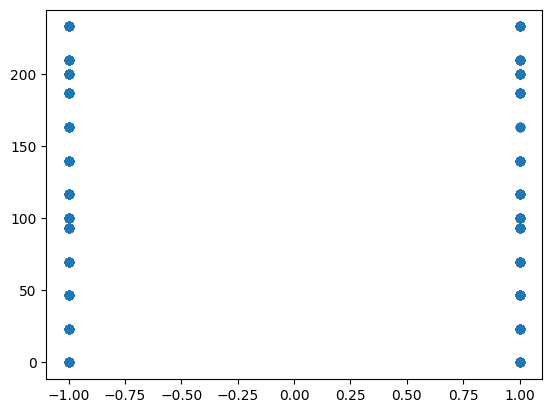

In [425]:
plt.scatter(df['y'], df['_DRNKWEK'], alpha=0.1)
plt.show()

In [431]:
print("Log(1+x) skewness:", np.log1p(df["_DRNKWEK"]).skew())
print(" skewness:", df["_DRNKWEK"].skew())

Log(1+x) skewness: 0.2660420580160751
 skewness: 2.2657620458261487


## FTJUDA1_ Can also try to add log to variable so that reduce skeweness and see which performs better(positively skewed variable)

### > 20 seems very not plausible

In [438]:
# compute median ignoring NaNs
median_val = np.nanmedian(train_clean['FTJUDA1_'])

# replace values greater than 250 with the median
train_clean['FTJUDA1_'][train_clean['FTJUDA1_'] > 20] = median_val

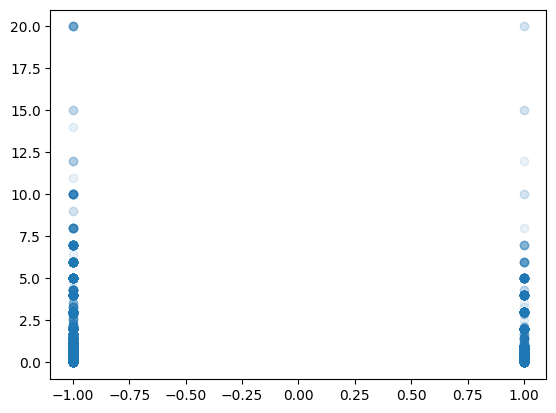

In [442]:
plt.scatter(df['y'], df['FTJUDA1_'], alpha=0.1)
plt.show()

In [443]:
print(" skewness:", df["FTJUDA1_"].skew())

 skewness: 4.931998242460201


## FRUTDA1_

### > 20 seems very not plausible

In [453]:
# compute median ignoring NaNs
median_val = np.nanmedian(train_clean['FRUTDA1_'])

# replace values greater than 250 with the median
train_clean['FRUTDA1_'][train_clean['FRUTDA1_'] > 20] = median_val

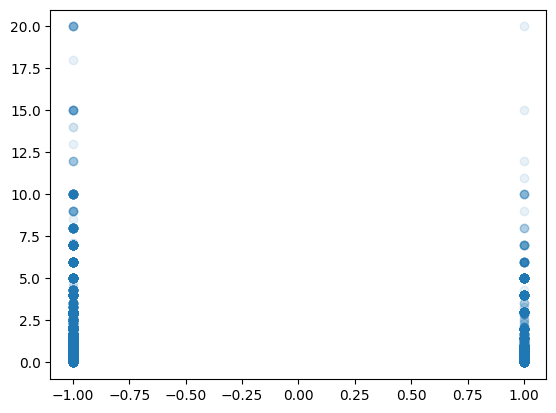

In [454]:
plt.scatter(df['y'], df['FRUTDA1_'], alpha=0.1)
plt.show()

In [455]:
print(" skewness:", df["FTJUDA1_"].skew())

 skewness: 4.931998242460201


# BEANDAY_


### > 10 seems very not plausible

In [462]:
# compute median ignoring NaNs
median_val = np.nanmedian(train_clean['BEANDAY_'])

# replace values greater than 250 with the median
train_clean['BEANDAY_'][train_clean['BEANDAY_'] > 10] = median_val

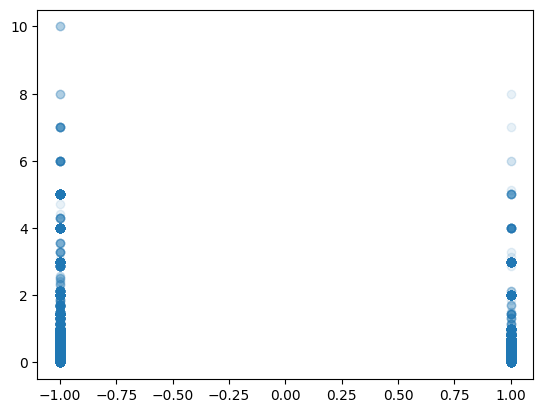

In [465]:
plt.scatter(df['y'], df['BEANDAY_'], alpha=0.1)


In [466]:
print(" skewness:", df["BEANDAY_"].skew())

 skewness: 4.7062806787759595


# GRENDAY_

### > 10 seems very not plausible

In [468]:
# compute median ignoring NaNs
median_val = np.nanmedian(train_clean['GRENDAY_'])

# replace values greater than 250 with the median
train_clean['GRENDAY_'][train_clean['GRENDAY_'] > 10] = median_val

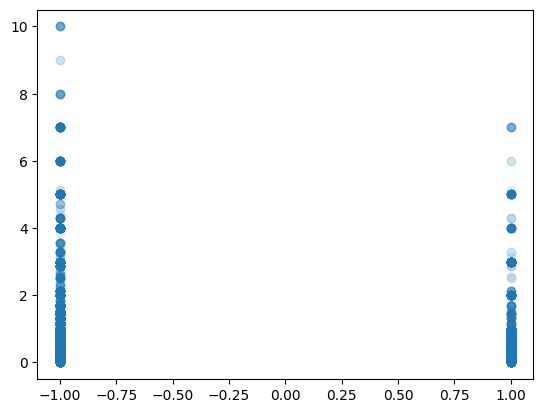

In [471]:
plt.scatter(df['y'], df['GRENDAY_'], alpha=0.1)


In [478]:
print(" skewness:", df["GRENDAY_"].skew())

 skewness: 2.9114896802584886


## ORNGDAY_

### > 10 seems very not plausible

In [474]:
median_val = np.nanmedian(train_clean['ORNGDAY_'])

# replace values greater than 250 with the median
train_clean['ORNGDAY_'][train_clean['ORNGDAY_'] > 10] = median_val

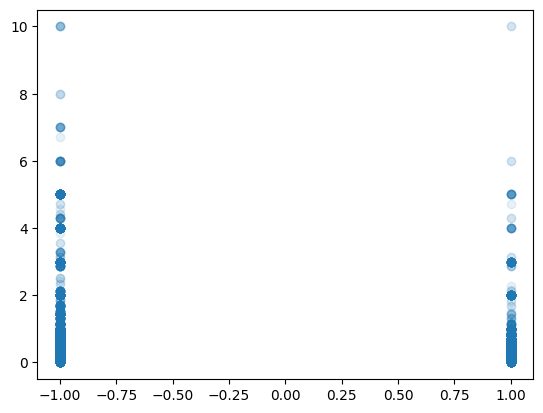

In [477]:
plt.scatter(df['y'], df['ORNGDAY_'], alpha=0.1)

In [479]:
print(" skewness:", df["ORNGDAY_"].skew())

 skewness: 4.5085569233224145
